# E-Commerce: Product Range Analysis
<a id='top'></a>

1. [Project description](#1)
2. [Data preprocessing](#2)
3. [Exploratory data analysis](#3)
4. [Analysis of the product range](#4)
5. [Testing hypotheses](#5)
6. [Conclusion.](#6)

`Presentation`: https://drive.google.com/file/d/1qZicUZst57GrMf69nS0Dw8bUKnnW0ykC/view?usp=sharing

`Dashboards`: https://public.tableau.com/profile/aa1502#!/vizhome/ECommerce_Product_Range_Analysis/Dashboard1

## 1. Project description <a id='1'></a>
[Back to top](#top)

**Task:**

****Analyze the store's product range.****

- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses

**Description of the data:**

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

## 2. Data preprocessing <a id='2'></a>

* Check the correctness of column names
* Study type correspondence
* Study missing values
* Study duplicate values
* Remove duplicates
* Convert types
* Replace missing values


[Back to top](#top)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import re

In [2]:
ecommerce = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')

In [3]:
# Check the correctness of column names
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


Let's not change the CamelCase

In [4]:
# general information and types
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [5]:
# study missing values
ecommerce.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [6]:
# study duplicate values
ecommerce.duplicated().sum()

5268

In [7]:
# drop duplicates
ecommerce.drop_duplicates(inplace=True)
# check results
ecommerce.duplicated().sum()

0

In [8]:
# we have missing values in CustomerID
# we need to decide remove it or not
ecommerce.CustomerID.describe()

count    401604.000000
mean      15281.160818
std        1714.006089
min       12346.000000
25%       13939.000000
50%       15145.000000
75%       16784.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [9]:
# let's replace NaNs:
# in Description with 'unknown'
# in CustomerID with '99999'
# we'll decide how to deal with this on the stage

ecommerce.Description.fillna('unknown', inplace=True)
ecommerce.CustomerID.fillna(99999, inplace=True)
# check results
ecommerce.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [10]:
# convert types
ecommerce.InvoiceDate = pd.to_datetime(ecommerce.InvoiceDate)
ecommerce.CustomerID = ecommerce.CustomerID.astype(int)


# rename column 'InvoiceDate' to 'InvoiceDateTime'
ecommerce.columns = ['InvoiceNo','StockCode','Description','Quantity','InvoiceDateTime','UnitPrice','CustomerID']

# check results
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        536641 non-null  object        
 1   StockCode        536641 non-null  object        
 2   Description      536641 non-null  object        
 3   Quantity         536641 non-null  int64         
 4   InvoiceDateTime  536641 non-null  datetime64[ns]
 5   UnitPrice        536641 non-null  float64       
 6   CustomerID       536641 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 30.7+ MB


In [11]:
# list of unknown CustomerID
no_id_list = list(ecommerce[ecommerce.CustomerID == 99999]['InvoiceNo'].unique())


# auxiliary check if exist some Invoices with both known and unknown CustomerID:
len(ecommerce[(ecommerce.InvoiceNo.isin(no_id_list)) & (ecommerce.CustomerID != 99999)])

0

there is no relation between unknown CustomerID ('99999') and other CustomerIDs thus we can't replace it with known ID

## 3. Exploratory data analysis <a id='3'></a>
[Back to top](#top)

In [12]:
ecommerce.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,36599.030398
std,219.130156,97.233118,36793.387497
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,16255.000000
75%,10.000000,4.130000,99999.000000
max,80995.000000,38970.000000,99999.000000


In [13]:
# remove non-relevant purchases
ecommerce_purchases = ecommerce[(ecommerce.UnitPrice>0) & (ecommerce.Quantity>0) & (ecommerce.CustomerID != 99999)].copy()

In [14]:
# check results
len(ecommerce_purchases[ecommerce_purchases.Description == 'unknown'])

0

#### Study outliers:

In [15]:
ecommerce_purchases[['Quantity']].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Quantity,392692.0,13.119702,180.492832,1.0,1.0,1.0,2.0,6.0,12.0,36.0,120.0,80995.0


In [16]:
ecommerce_purchases[['UnitPrice']].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
UnitPrice,392692.0,3.125914,22.241836,0.001,0.21,0.42,1.25,1.95,3.75,8.5,14.95,8142.75


#### Summary statistics:

In [17]:
# Summary statistics:
ecommerce_purchases.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99], include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID
count,392692,392692,392692,392692.000000,392692,392692.000000,392692.000000
unique,18532,3665,3877,NaN,17282,NaN,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2019-11-12 15:27:00,NaN,NaN
freq,542,2023,2016,NaN,542,NaN,NaN
first,NaN,NaN,NaN,NaN,2018-11-29 08:26:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-07 12:50:00,NaN,NaN
mean,NaN,NaN,NaN,13.119702,NaN,3.125914,15287.843865
std,NaN,NaN,NaN,180.492832,NaN,22.241836,1713.539549
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000
1%,NaN,NaN,NaN,1.000000,NaN,0.210000,12415.000000


In [18]:
# plt.figure(figsize=(12, 7))
# sns.heatmap(ecommerce_purchases.corr(), annot=True)
# plt.show()
ecommerce_purchases.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004578,-0.006029
UnitPrice,-0.004578,1.000000,-0.010800
CustomerID,-0.006029,-0.010800,1.000000


#### there's no correlation between variables

#### Additinal columns:

In [19]:
# additinal columns

ecommerce_purchases['ItemSum'] = ecommerce_purchases['UnitPrice'] * ecommerce_purchases['Quantity']
ecommerce_purchases['InvoiceMonth'] = ecommerce_purchases.InvoiceDateTime.astype('datetime64[M]').dt.date

ecommerce_purchases['InvoiceDate'] = ecommerce_purchases['InvoiceDateTime'].dt.date

# Note! The day of the week with Monday=0, Sunday=6.
# ecommerce_purchases['InvoiceDayOfWeek'] = ecommerce_purchases.InvoiceDate.dt.dayofweek

# column Sum of Invoice
ecommerce_purchases['InvoiceSum'] = ecommerce_purchases.groupby('InvoiceNo')['ItemSum'].transform('sum')

In [20]:
ecommerce_purchases.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,ItemSum,InvoiceMonth,InvoiceDate,InvoiceSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-01,2018-11-29,139.12
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-01,2018-11-29,139.12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-01,2018-11-29,139.12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-01,2018-11-29,139.12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-01,2018-11-29,139.12


In [21]:
# to display Items distribution we need to label 'StockCode' (type string) and get 'StockCode_labeled' (type int)

from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder() # creating a variable of the LabelEncoder class

ecommerce_purchases['StockCode_labeled'] = encoder.fit_transform(ecommerce_purchases['StockCode']) 

ecommerce_purchases[['StockCode','StockCode_labeled']].head()

,StockCode,StockCode_labeled
0,85123A,3233
1,71053,2643
2,84406B,2847
3,84029G,2795
4,84029E,2794


#### Frequency of items:

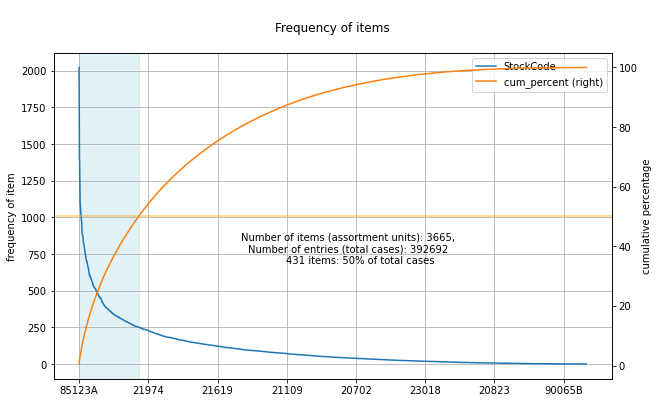

In [22]:
# df with counts of items unique values in descending order:
items_freq = pd.DataFrame(ecommerce_purchases['StockCode'].value_counts())

# cumulative percentage
items_freq['cum_percent'] = ecommerce_purchases['StockCode'].value_counts().cumsum()\
                               /ecommerce_purchases['StockCode'].value_counts().sum() * 100

ax = items_freq.plot(secondary_y='cum_percent', grid=True, figsize=(10, 6))

ax.set_ylabel('frequency of item')
ax.right_ax.set_ylabel('cumulative percentage')

# setting a limit as a percentage of the total number of cases:
lim_perc = 50

ax.right_ax.axhline(lim_perc, color='orange', alpha=.5)

ax.axvspan(0, len(items_freq[items_freq.cum_percent <= lim_perc]), 
           color='lightblue', alpha=.35)

ax.text(0.55, (lim_perc-5)/100, 
        f"Number of items (assortment units): {len(items_freq)},\
        \nNumber of entries (total cases): {ecommerce_purchases['StockCode'].value_counts().sum()}\
        \n{len(items_freq[items_freq.cum_percent <= lim_perc])} items: {lim_perc}% of total cases",
        ha='center', va='top', transform=ax.transAxes)


plt.title('\nFrequency of items\n')
plt.show()

#### 10 most frequently-occurring items:

In [23]:
ecommerce_purchases['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64

#### The most frequently-occurring items displayed as a word cloud:

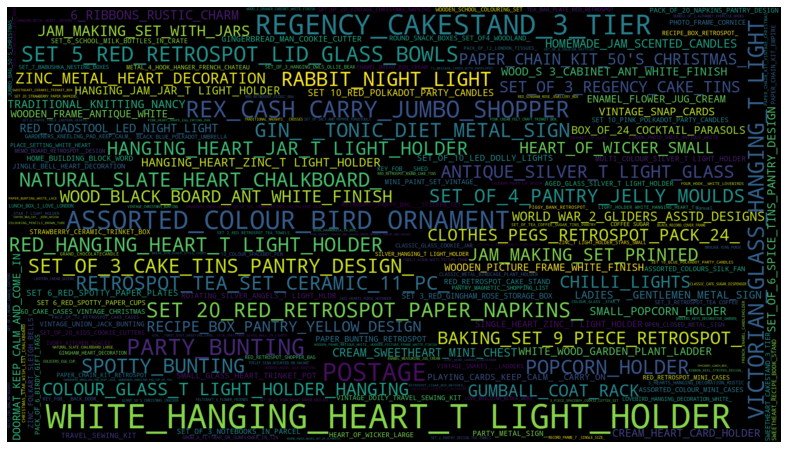

In [24]:
from wordcloud import WordCloud

text = ' '.join(line.replace(' ', '_') for line in ecommerce_purchases['Description'])

# creating wordcloud image:
wordcloud = WordCloud(width=1920, 
                      height=1080, 
#                       background_color='white'
                     ).generate(text)

# Display the image:
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Distribution of Invoices by Month

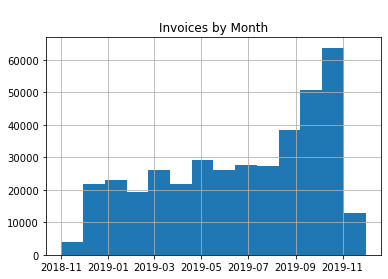

In [25]:
# plt.figure(figsize=(11, 5))

ecommerce_purchases['InvoiceMonth'].hist(bins=14)

plt.title('\nInvoices by Month')

plt.show()

We can see peak of number of invoices in 2019-11

#### Distribution by Month:
* Quantity
* Price

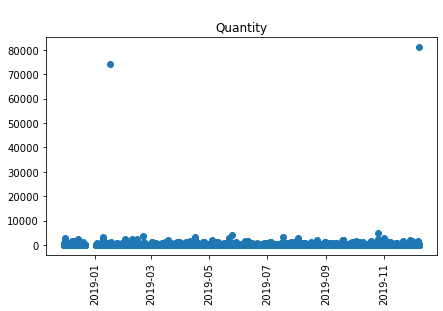

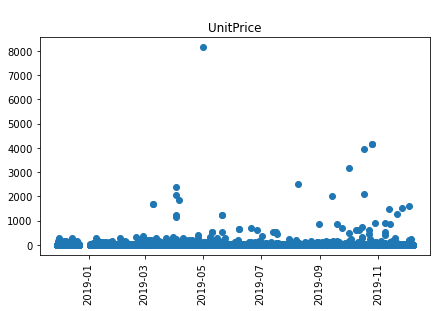

In [26]:
cols = ['Quantity', 'UnitPrice']

for col in cols:
#     x_val = pd.Series(range(len(ecommerce_purchases[col])))
    plt.figure(2, figsize=(7, 4))
    plt.title(f'\n{col}')
    plt.scatter(ecommerce_purchases['InvoiceDateTime'], ecommerce_purchases[col])
#     plt.ylim(0, 10)
    plt.xticks(rotation=90)

    plt.show()

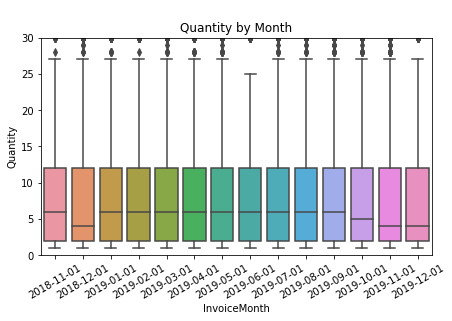

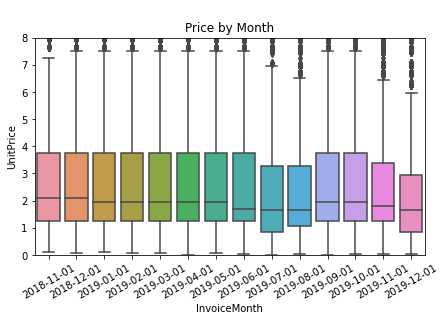

In [27]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='InvoiceMonth', y='Quantity', data=ecommerce_purchases)
plt.ylim(0, 30)
plt.xticks(rotation=30)
plt.title('\nQuantity by Month')
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(x='InvoiceMonth', y='UnitPrice', data=ecommerce_purchases)
plt.ylim(0, 8)
plt.xticks(rotation=30)
plt.title('\nPrice by Month')
plt.show()

First quartile and third quartile look almost equal for every month

The median remains stable for most of the months

#### Conclusion:

Quantity and price look stable
by months:
* quantity:
    * in range: First quartile=12 Third quartile=2  
    * median about 6
* price:
    * in range: First quartile about 1.25 Third quartile about 3.75
    * median about 1.95
    
Quantity & price:
* there's no correlation between quantity and price

Items. There are groups with different activity:
* 431 items hold 50% of total cases

Time and sales:
* peak of number of invoices in 2019-11


## 4. Analysis of the product range <a id='4'></a>
[Back to top](#top)

**What do we have to analyze the product range:**

* Product (aka Assortment unit, SKU) 
* Quantity
* Price
* Customer
* DateTime
* InvoiceNo - purchase 


#### What can we calculate:

* $\text{Revenue} = \text{Quantity}*\text{Price}$
<br>

* $\text{Average check} = \frac{\text{Revenue}}{\text{Number of purchases}}$
<br>

* Average revenue per paying user:
<br>

    * $\text{ARPPU} = \frac{\text{Revenue}}{\text{Number of paying users}}$       


* Number of purchases per day
* Number of customers
* Number of assortment units
* Revenue per assortment unit
<br>


* Share of active months (Time in the market):
<br>

    * $\text{Demand coefficient} = \frac{\text{Months when the item was purchased}}{\text{Total number of months}}$

        * Rounded to one decimal place
        * 10 ranks: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
            * 0.1 = 10% of Total number of months item was purchased
            * 1.0 = 100% of Total number of months (item was purchased in every month) 


* ABC inventory categorization method (volume of revenue)
    * We will take the following breakdown of ABC classes:
        * "A" 80% of value of the items
        * "B" 16% of value of the items
        * "C" 4%  of value of the items


* FMR (Fastest Medium Rare) inventory categorization method (number of purchases)
    * We will take the same breakdown as above:
        * "F" 80% of number of purchases of the item
        * "M" 16% of number of purchases of the item
        * "R" 4%  of number of purchases of the item
 

#### Group by:
* month
* day 
* product
* plus some combinations with groups above


### Basic calculations:

In [28]:
purchases_by_months = ecommerce_purchases.groupby('InvoiceMonth').agg({'InvoiceNo':'nunique',
                                                                       'CustomerID':'nunique',
                                                                       'StockCode':'nunique',
                                                                       'ItemSum':'sum',
                                                                       'Quantity':'sum',
                                                                       'UnitPrice':'median',
                                                                       'InvoiceDate':'nunique'}).round(2)


purchases_by_months.columns = ['number_of_purchases','number_of_customers','number_of_assortment_units',
                               'revenue','quantity','price_median','number_of_days']
purchases_by_months

,number_of_purchases,number_of_customers,number_of_assortment_units,revenue,quantity,price_median,number_of_days
InvoiceMonth,,,,,,,
2018-11-01,258,188,1309,93390.06,55191,2.10,2
2018-12-01,1142,768,2346,477032.67,255857,2.10,18
2019-01-01,1101,808,2168,611551.16,372376,1.95,26
2019-02-01,981,745,2125,444922.80,261298,1.95,24
2019-03-01,1291,950,2217,576281.93,345687,1.95,26
2019-04-01,1099,827,2208,450844.54,276901,1.95,21
2019-05-01,1616,1081,2257,713856.34,392308,1.95,26
2019-06-01,1356,973,2308,628733.19,347189,1.69,25
2019-07-01,1369,972,2385,626866.58,385406,1.65,27


In [29]:
purchases_by_months['avg_price'] = (purchases_by_months['revenue'] / purchases_by_months['quantity']).round(2)
purchases_by_months['avg_check'] = (purchases_by_months['revenue'] / purchases_by_months['number_of_purchases']).round(2)
purchases_by_months['ARPPU'] = (purchases_by_months['revenue'] / purchases_by_months['number_of_customers']).round(2)

purchases_by_months['revenue_per_assortment_unit'] = (purchases_by_months['revenue']\
                                                      / purchases_by_months['number_of_assortment_units']).round(2)

purchases_by_months['number_of_purchases_per_day'] = (purchases_by_months['number_of_purchases']\
                                                      / purchases_by_months['number_of_days']).round()

purchases_by_months['revenue_per_day'] = (purchases_by_months['revenue'] / purchases_by_months['number_of_days']).round()


purchases_by_months = purchases_by_months[['number_of_purchases','quantity','price_median','avg_price', 'number_of_days',
                                           'avg_check', 'ARPPU','number_of_assortment_units','revenue_per_assortment_unit',
                                           'number_of_purchases_per_day','revenue_per_day','revenue','number_of_customers']]

purchases_by_months

,number_of_purchases,quantity,price_median,avg_price,number_of_days,avg_check,ARPPU,number_of_assortment_units,revenue_per_assortment_unit,number_of_purchases_per_day,revenue_per_day,revenue,number_of_customers
InvoiceMonth,,,,,,,,,,,,,
2018-11-01,258,55191,2.10,1.69,2,361.98,496.76,1309,71.34,129.0,46695.0,93390.06,188
2018-12-01,1142,255857,2.10,1.86,18,417.72,621.14,2346,203.34,63.0,26502.0,477032.67,768
2019-01-01,1101,372376,1.95,1.64,26,555.45,756.87,2168,282.08,42.0,23521.0,611551.16,808
2019-02-01,981,261298,1.95,1.70,24,453.54,597.21,2125,209.38,41.0,18538.0,444922.80,745
2019-03-01,1291,345687,1.95,1.67,26,446.38,606.61,2217,259.94,50.0,22165.0,576281.93,950
2019-04-01,1099,276901,1.95,1.63,21,410.23,545.16,2208,204.19,52.0,21469.0,450844.54,827
2019-05-01,1616,392308,1.95,1.82,26,441.74,660.37,2257,316.29,62.0,27456.0,713856.34,1081
2019-06-01,1356,347189,1.69,1.81,25,463.67,646.18,2308,272.41,54.0,25149.0,628733.19,973
2019-07-01,1369,385406,1.65,1.63,27,457.90,644.92,2385,262.84,51.0,23217.0,626866.58,972


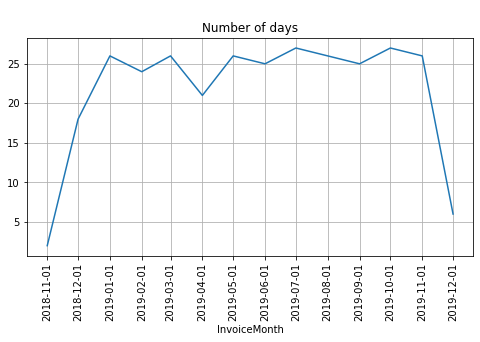

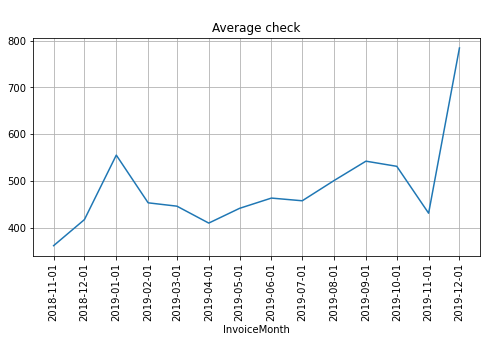

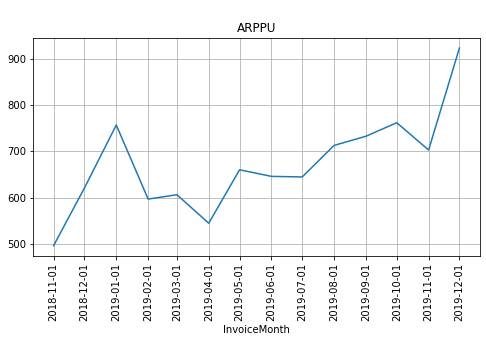

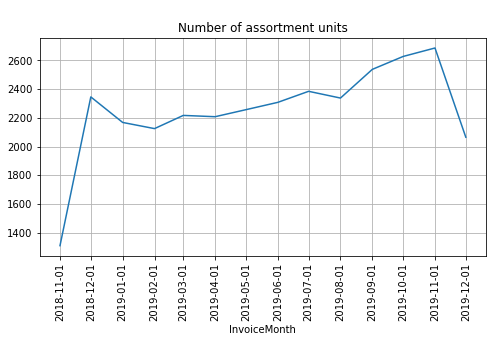

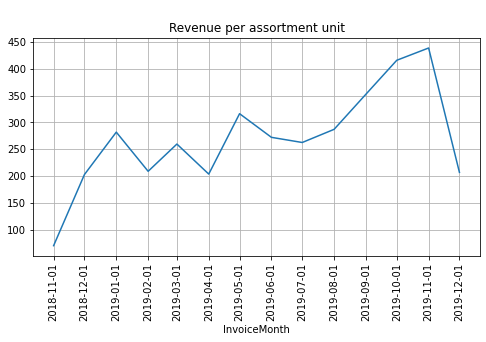

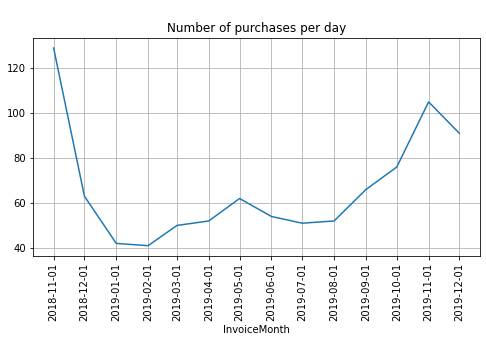

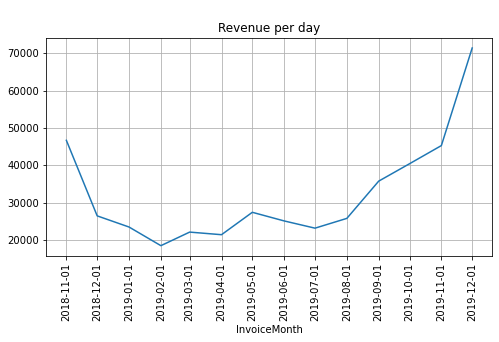

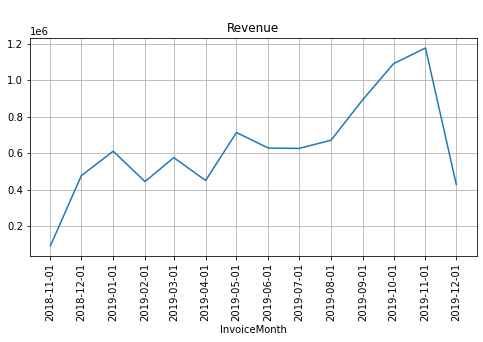

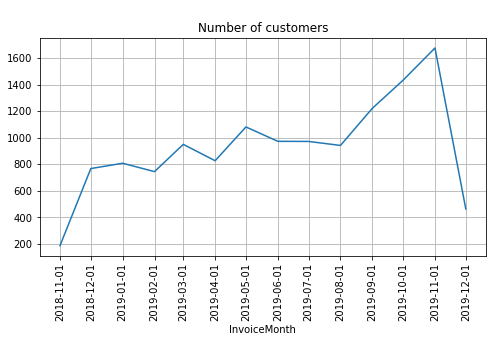

In [30]:
titles = ['Number of days', 'Average check', 'ARPPU', 'Number of assortment units',
          'Revenue per assortment unit', 'Number of purchases per day', 
          'Revenue per day','Revenue','Number of customers']

for col, ttl in zip(purchases_by_months.columns[4:], titles):
    plt.figure(figsize=(8, 4))
    purchases_by_months[col].plot(kind='line', grid=True)

    plt.xticks(purchases_by_months.index, rotation=90)
    plt.title(f'\n{ttl}')

    plt.show()

Graphs show peak of activity from 2019-09 to 2019-11

Also we can see the peak of 'Number of purchases per day' in 2018-11:
* 247 purchases in 2 days

    
In the period from 2019-09 to 2019-11 Number of assortment units increased by about 300 items
    
From heatmap below we can see high correlation between
    
`'number_of_assortment_units'` and `'number_of_purchases','revenue_per_assortment_unit','number_of_customers'`

Let's take a closer look at these products


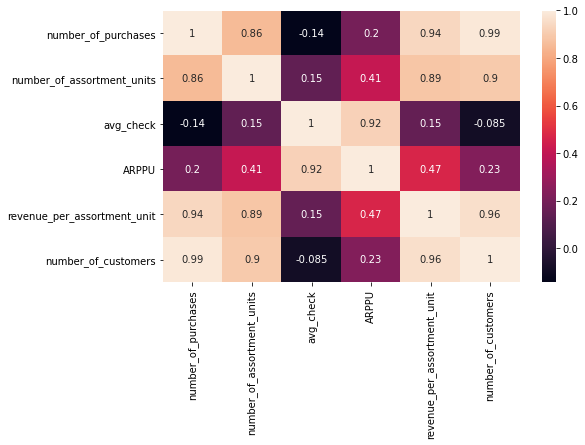

In [31]:
plt.figure(figsize=(8, 5))
sns.heatmap(purchases_by_months[['number_of_purchases', 'number_of_assortment_units','avg_check',
                                  'ARPPU','revenue_per_assortment_unit','number_of_customers']].corr(), annot=True)
plt.show()

In [32]:
# all items in the period from 2019-09 to 2019-11:
sep_nov = ecommerce_purchases[ecommerce_purchases.InvoiceMonth.between(pd.to_datetime('2019-09-01'),
                                                                       pd.to_datetime('2019-11-01'))]['StockCode'].unique()

# all items in the period before 2019-09:
before_sep = ecommerce_purchases[ecommerce_purchases.InvoiceMonth < pd.to_datetime('2019-09-01')]['StockCode'].unique()

# new items in the period from 2019-09 to 2019-11:
new_items = set(sep_nov) - set(before_sep)

# number of new items:
len(new_items) #, len(sep_nov), len(before_sep)

259

In [33]:
# new column for 'NewItems'
ecommerce_purchases['NewItems'] = ecommerce_purchases.StockCode.isin(new_items).astype(int)

# check results
ecommerce_purchases.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,ItemSum,InvoiceMonth,InvoiceDate,InvoiceSum,StockCode_labeled,NewItems
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-01,2018-11-29,139.12,3233,0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-01,2018-11-29,139.12,2643,0


    
#### New items in the period from 2019-09 to 2019-11 displayed as a word cloud:


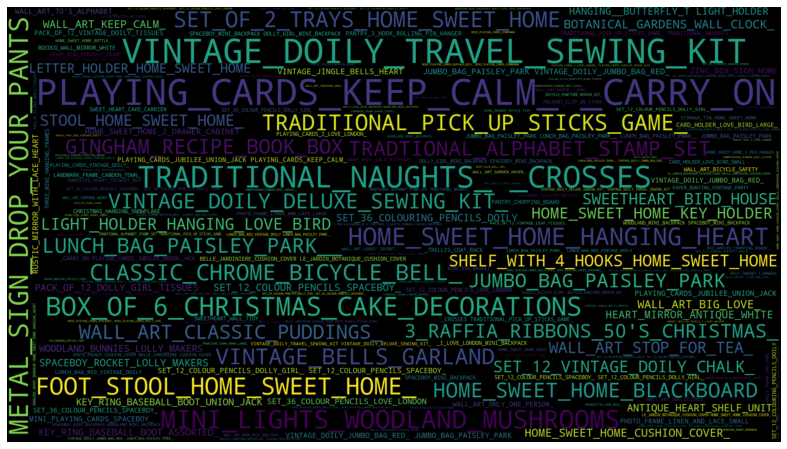

In [34]:
from wordcloud import WordCloud

text = ' '.join(line.replace(' ', '_') for line in ecommerce_purchases[ecommerce_purchases['NewItems'] == 1]['Description'])

# creating wordcloud image:
wordcloud = WordCloud(width=1920, 
                      height=1080, 
#                       background_color='white'
                     ).generate(text)

# Display the image:
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
new_items_rev = ecommerce_purchases.pivot_table(index='InvoiceMonth',
                                                columns='NewItems',
                                                values=['ItemSum', 'StockCode'],
                                                aggfunc={'ItemSum':'sum','StockCode':'nunique'}).dropna() #.reset_index()

new_items_rev.columns = ['revenue_old','revenue_new','number_of_assort_units_old','number_of_assort_units_new']

new_items_rev['rev_per_assort_unit_old'] = (new_items_rev.revenue_old\
                                                    / new_items_rev.number_of_assort_units_old).round(2)
new_items_rev['rev_per_assort_unit_new'] = (new_items_rev.revenue_new\
                                                    / new_items_rev.number_of_assort_units_new).round(2)

new_items_rev['increase_per_assort_unit'] = (new_items_rev['rev_per_assort_unit_new']\
                                             / new_items_rev['rev_per_assort_unit_old'] - 1).round(4) * 100

new_items_rev['share_revenue_new'] = (new_items_rev.revenue_new\
                                                    / (new_items_rev.revenue_new + new_items_rev.revenue_old)).round(2) * 100

new_items_rev.T

InvoiceMonth,2019-09-01,2019-10-01,2019-11-01,2019-12-01
revenue_old,858663.082,947583.85,1065031.66,392002.16
revenue_new,35944.620,144184.62,112499.42,36256.81
number_of_assort_units_old,2422.000,2428.00,2455.00,1871.00
number_of_assort_units_new,116.000,200.00,232.00,194.00
rev_per_assort_unit_old,354.530,390.27,433.82,209.51
rev_per_assort_unit_new,309.870,720.92,484.91,186.89
increase_per_assort_unit,-12.600,84.72,11.78,-10.80
share_revenue_new,4.000,13.00,10.00,8.00


New items show higher `'revenue_per_assortment_unit'` in 2019-10, 2019-11
    
`Share of revenue of new items` in 2019-10, 2019-11 is 13% and 10% respectively
    
Probably the increase in sales is just triggered by holidays   


### Assortment categorization:
#### Calculation of ABC groups and Share of active months

In [36]:
# we calculate ABC/FMR group for every month
# but to calculate mean over the whole period (Overall ABC/FMR), we put numbers
# and then we'll convert numbers to 'ABC/FMR': 
                                            # {1.0: 'A', 2.0: 'B', 3.0: 'C'}
                                            # {1.0: 'F', 2.0: 'M', 3.0: 'R'}

# function to calculate ABC and FMR groups:
def abc_calc(x):
    return pd.cut(x.sort_values(ascending=False).cumsum() / x.sum(), [0, 0.8, 0.96, 1], labels=[1, 2, 3])



purchases_abc = ecommerce_purchases.pivot_table(index='Description',
                                                columns='InvoiceMonth',
                                                values='ItemSum',
                                                aggfunc='sum')

purchases_abc.columns = purchases_abc.columns.astype(str)

for i in purchases_abc.columns:    
    purchases_abc[re.sub('$', '_ABC', str(i))] = abc_calc(purchases_abc[i])

    
purchases_abc['count_abc'] = purchases_abc.iloc[:,14:28].count(1)

# 'demand_coef' - rounded to one decimal place | 10 ranks: min=0.1 max=1 | in other words it's a share of active months 
purchases_abc['DemandCoef'] = (purchases_abc.iloc[:,14:28].count(1) / len(purchases_abc.columns[14:28])).round(1)


purchases_abc['mean_abc'] = purchases_abc.iloc[:,14:28].mean(1).round()



# dictionary to convert numbers to 'ABC' groups
abc = {1.0: 'A', 2.0: 'B', 3.0: 'C'}

purchases_abc['OverallABC'] = purchases_abc.mean_abc.apply(lambda x: abc[x])    

In [37]:
purchases_abc.iloc[:,14:].head()

InvoiceMonth,2018-11-01_ABC,2018-12-01_ABC,2019-01-01_ABC,2019-02-01_ABC,2019-03-01_ABC,2019-04-01_ABC,2019-05-01_ABC,2019-06-01_ABC,2019-07-01_ABC,2019-08-01_ABC,2019-09-01_ABC,2019-10-01_ABC,2019-11-01_ABC,2019-12-01_ABC,count_abc,DemandCoef,mean_abc,OverallABC
Description,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,3,3,3,3,3,3,3,3,3,3,3,3,2,3,14,1.0,3.0,C
50'S CHRISTMAS GIFT BAG LARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1,1,3,5,0.4,2.0,B
DOLLY GIRL BEAKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,1,2,2,6,0.4,2.0,B
I LOVE LONDON MINI BACKPACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,2,4,0.3,2.0,B
I LOVE LONDON MINI RUCKSACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,1,0.1,3.0,C


In [38]:
# join new columns ['OverallABC'] and ['DemandCoef'] to the main dataframe:

ecommerce_purchases = ecommerce_purchases.merge(purchases_abc[['OverallABC','DemandCoef']].reset_index(), 
                                                on=['Description'], 
                                                how='left') 

#### Overall revenue by group A
#### Top 10 products  


In [39]:
ecommerce_purchases[ecommerce_purchases['OverallABC'] == 'A']\
                    .pivot_table(index='Description',
                                 columns='InvoiceMonth',
                                 values='ItemSum',
                                 aggfunc='sum',
                                 margins=True).sort_values(by='All', ascending=False).head(11).iloc[1:]

InvoiceMonth,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,All
Description,,,,,,,,,,,,,,,
"PAPER CRAFT , LITTLE BIRDIE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168469.60,168469.60
REGENCY CAKESTAND 3 TIER,2386.20,15195.30,11297.70,11581.35,12549.50,12466.50,12220.60,7700.05,12126.30,9931.80,7394.28,12137.40,11315.94,3961.83,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,1950.90,7651.15,16055.20,4145.95,5302.80,9250.30,11643.27,3538.70,8438.67,5962.40,6116.25,4810.34,13952.18,1573.99,100392.10
JUMBO BAG RED RETROSPOT,1023.90,2595.30,5763.30,4487.70,8011.66,4307.40,6687.24,6432.78,6285.64,9769.68,7193.05,10362.34,11280.11,840.44,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,NaN,NaN,77183.60,NaN,NaN,NaN,884.04,443.51,911.94,401.09,397.26,284.92,736.86,173.51,81416.73
POSTAGE,105.00,4325.00,5471.00,3012.00,5593.00,3077.95,13341.75,5437.02,5559.29,5208.00,5570.50,8347.50,10652.95,2103.00,77803.96
PARTY BUNTING,NaN,793.50,2269.20,3463.00,5768.20,7293.30,13961.85,7737.30,10390.35,6484.25,4060.30,2447.32,3834.51,282.15,68785.23
ASSORTED COLOUR BIRD ORNAMENT,1138.31,2514.28,3519.71,1856.09,4145.01,3690.68,5151.31,2374.92,3101.15,9679.45,4717.92,5005.97,8428.93,1089.30,56413.03
Manual,20.20,207.97,109.40,1801.83,3559.01,10070.90,4306.86,768.16,1796.77,4080.13,2090.65,21183.63,2996.96,427.46,53419.93


First position: 'PAPER CRAFT , LITTLE BIRDIE'
    
maximum revenue but only one month of sales

large volume, but no stability

so we will calculate FMR (Fastest Medium Rare) groups for stability

#### Demand Coefficient and OverallABC groups by months

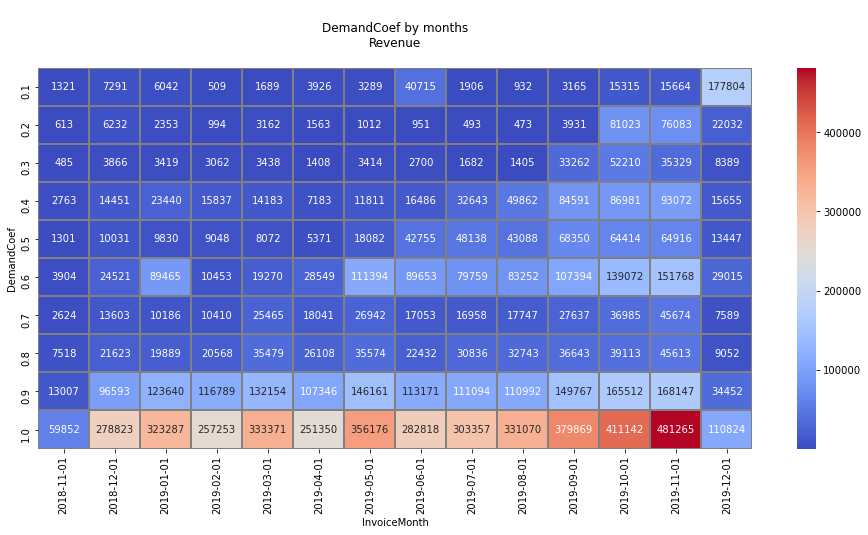

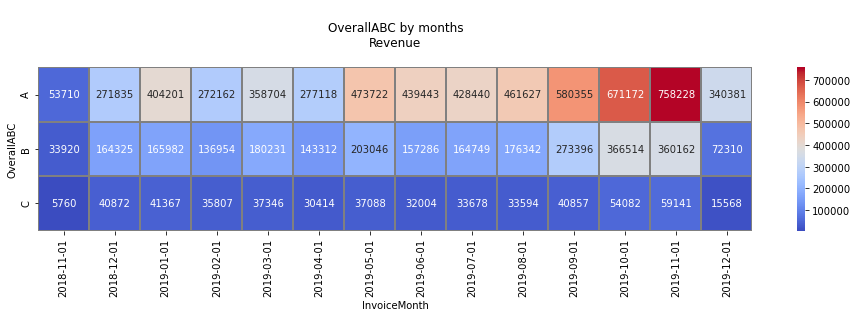

In [40]:

plt.figure(figsize=(16, 7))
sns.heatmap(purchases_abc.pivot_table(index='DemandCoef', 
                                      values=purchases_abc.columns[:14], 
                                      aggfunc='sum').round(0), annot=True, fmt='.0f', 
                                                                linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nDemandCoef by months\nRevenue\n')
plt.show()



plt.figure(figsize=(16, 3))
sns.heatmap(purchases_abc.pivot_table(index='OverallABC', 
                                      values=purchases_abc.columns[:14], 
                                      aggfunc='sum').round(0), annot=True, fmt='.0f', 
                                                                linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nOverallABC by months\nRevenue\n')
plt.show()

The most profitable:
* group with Demand coefficient  = “1.0”
* group 'A'



#### Calculation of FMR (Fastest Medium Rare) groups

In [41]:
# FMR groups (Fastest Medium Rare technique)

purchases_fmr = ecommerce_purchases.pivot_table(index='Description',
                                                columns='InvoiceMonth',
                                                values='InvoiceNo',
                                                aggfunc='nunique')

purchases_fmr.columns = purchases_fmr.columns.astype(str)


for i in purchases_fmr.columns:    
    purchases_fmr[re.sub('$', '_FMR', str(i))] = abc_calc(purchases_fmr[i])

    
# purchases_fmr['count_fmr'] = purchases_fmr.iloc[:,14:28].count(1)
purchases_fmr['mean_fmr'] = purchases_fmr.iloc[:,14:28].mean(1).round()


# dictionary to convert numbers to 'FMR' groups
fmr = {1.0: 'F', 2.0: 'M', 3.0: 'R'}

purchases_fmr['OverallFMR'] = purchases_fmr.mean_fmr.apply(lambda x: fmr[x]) 

In [42]:
purchases_fmr.iloc[:,14:].head()

InvoiceMonth,2018-11-01_FMR,2018-12-01_FMR,2019-01-01_FMR,2019-02-01_FMR,2019-03-01_FMR,2019-04-01_FMR,2019-05-01_FMR,2019-06-01_FMR,2019-07-01_FMR,2019-08-01_FMR,2019-09-01_FMR,2019-10-01_FMR,2019-11-01_FMR,2019-12-01_FMR,mean_fmr,OverallFMR
Description,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,3,3,3,3,3,3,3,3,3,3,2,3,2,1,3.0,R
50'S CHRISTMAS GIFT BAG LARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,1,2,1.0,F
DOLLY GIRL BEAKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1.0,F
I LOVE LONDON MINI BACKPACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,2,2.0,M
I LOVE LONDON MINI RUCKSACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,3.0,R


In [43]:
# join new column ['OverallFMR'] to the main dataframe:
ecommerce_purchases = ecommerce_purchases.merge(purchases_fmr[['OverallFMR']].reset_index(), 
                                                on=['Description'], 
                                                how='left') 

#### Overall revenue by group 'F'
group 'F' - max number of purchases 
    
#### Top 10 products    

In [44]:
ecommerce_purchases[ecommerce_purchases['OverallFMR'] == 'F']\
                    .pivot_table(index='Description',
                                 columns='InvoiceMonth',
                                 values='ItemSum',
                                 aggfunc='sum',
                                 margins=True).sort_values(by='All', ascending=False).head(11).iloc[1:]

InvoiceMonth,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,All
Description,,,,,,,,,,,,,,,
REGENCY CAKESTAND 3 TIER,2386.20,15195.30,11297.70,11581.35,12549.50,12466.50,12220.60,7700.05,12126.30,9931.80,7394.28,12137.40,11315.94,3961.83,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,1950.90,7651.15,16055.20,4145.95,5302.80,9250.30,11643.27,3538.70,8438.67,5962.40,6116.25,4810.34,13952.18,1573.99,100392.10
JUMBO BAG RED RETROSPOT,1023.90,2595.30,5763.30,4487.70,8011.66,4307.40,6687.24,6432.78,6285.64,9769.68,7193.05,10362.34,11280.11,840.44,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,NaN,NaN,77183.60,NaN,NaN,NaN,884.04,443.51,911.94,401.09,397.26,284.92,736.86,173.51,81416.73
POSTAGE,105.00,4325.00,5471.00,3012.00,5593.00,3077.95,13341.75,5437.02,5559.29,5208.00,5570.50,8347.50,10652.95,2103.00,77803.96
PARTY BUNTING,NaN,793.50,2269.20,3463.00,5768.20,7293.30,13961.85,7737.30,10390.35,6484.25,4060.30,2447.32,3834.51,282.15,68785.23
ASSORTED COLOUR BIRD ORNAMENT,1138.31,2514.28,3519.71,1856.09,4145.01,3690.68,5151.31,2374.92,3101.15,9679.45,4717.92,5005.97,8428.93,1089.30,56413.03
Manual,20.20,207.97,109.40,1801.83,3559.01,10070.90,4306.86,768.16,1796.77,4080.13,2090.65,21183.63,2996.96,427.46,53419.93
RABBIT NIGHT LIGHT,NaN,NaN,NaN,NaN,NaN,NaN,2250.42,2926.80,422.72,3556.00,74.34,13742.15,22862.41,5416.40,51251.24


#### Group 'A/F' - the most profitable and stable
#### Overall revenue by group 'A/F'
    
#### Top 10 products

In [45]:
ecommerce_purchases[(ecommerce_purchases['OverallABC'] == 'A') & (ecommerce_purchases['OverallFMR'] == 'F')]\
                    .pivot_table(index='Description',
                                 columns='InvoiceMonth',
                                 values='ItemSum',
                                 aggfunc='sum',
                                 margins=True).sort_values(by='All', ascending=False).head(11).iloc[1:]

InvoiceMonth,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,All
Description,,,,,,,,,,,,,,,
REGENCY CAKESTAND 3 TIER,2386.20,15195.30,11297.70,11581.35,12549.50,12466.50,12220.60,7700.05,12126.30,9931.80,7394.28,12137.40,11315.94,3961.83,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,1950.90,7651.15,16055.20,4145.95,5302.80,9250.30,11643.27,3538.70,8438.67,5962.40,6116.25,4810.34,13952.18,1573.99,100392.10
JUMBO BAG RED RETROSPOT,1023.90,2595.30,5763.30,4487.70,8011.66,4307.40,6687.24,6432.78,6285.64,9769.68,7193.05,10362.34,11280.11,840.44,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,NaN,NaN,77183.60,NaN,NaN,NaN,884.04,443.51,911.94,401.09,397.26,284.92,736.86,173.51,81416.73
POSTAGE,105.00,4325.00,5471.00,3012.00,5593.00,3077.95,13341.75,5437.02,5559.29,5208.00,5570.50,8347.50,10652.95,2103.00,77803.96
PARTY BUNTING,NaN,793.50,2269.20,3463.00,5768.20,7293.30,13961.85,7737.30,10390.35,6484.25,4060.30,2447.32,3834.51,282.15,68785.23
ASSORTED COLOUR BIRD ORNAMENT,1138.31,2514.28,3519.71,1856.09,4145.01,3690.68,5151.31,2374.92,3101.15,9679.45,4717.92,5005.97,8428.93,1089.30,56413.03
Manual,20.20,207.97,109.40,1801.83,3559.01,10070.90,4306.86,768.16,1796.77,4080.13,2090.65,21183.63,2996.96,427.46,53419.93
RABBIT NIGHT LIGHT,NaN,NaN,NaN,NaN,NaN,NaN,2250.42,2926.80,422.72,3556.00,74.34,13742.15,22862.41,5416.40,51251.24


Although we can see months of no sales in the 'A/F' group, the products in this group are reliable with the maximum number of purchases.


#### OverallFMR groups by months

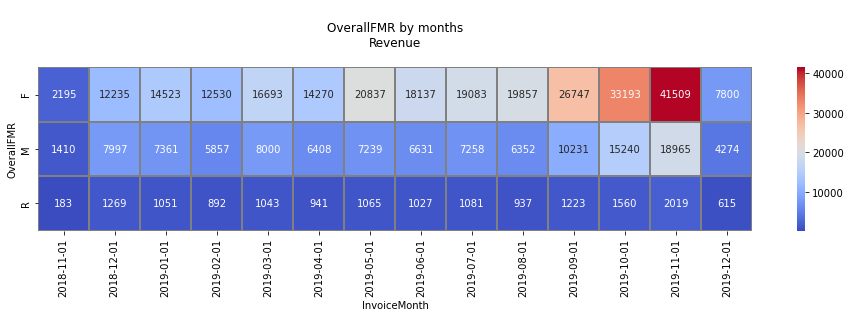

In [46]:
plt.figure(figsize=(16, 3))
sns.heatmap(purchases_fmr.pivot_table(index='OverallFMR', 
                                      values=purchases_abc.columns[:14], 
                                      aggfunc='sum').round(0), annot=True, fmt='.0f', 
                                                                linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nOverallFMR by months\nRevenue\n')
plt.show()

### ABC groups vs Demand Coefficient

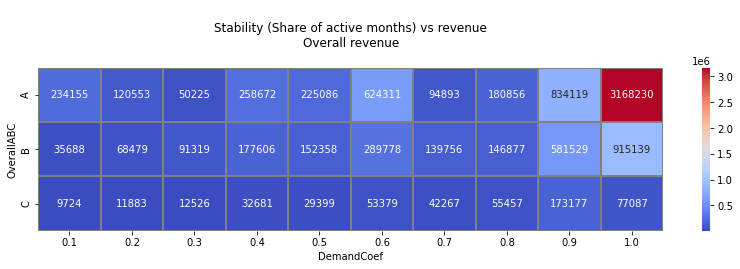

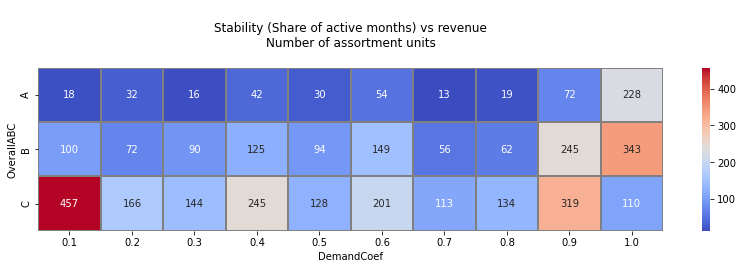

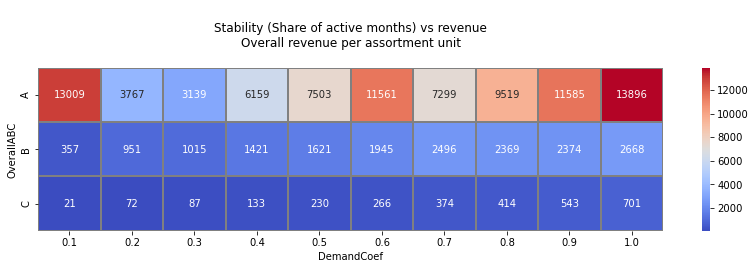

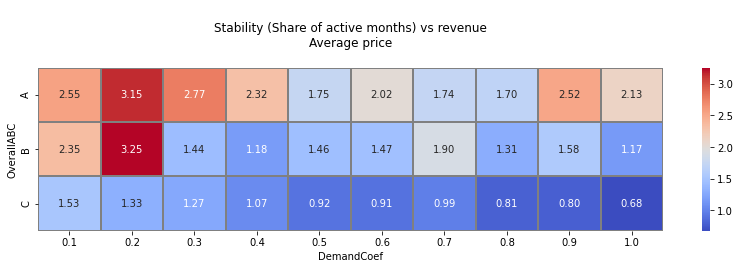

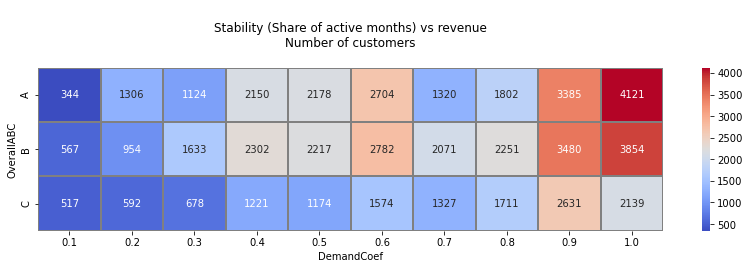

In [47]:
stability_vs_vol_sum = ecommerce_purchases.pivot_table(index='OverallABC',
                                                        columns='DemandCoef',
                                                        values='ItemSum',
                                                        aggfunc='sum').round(0)

stability_vs_vol_quantity = ecommerce_purchases.pivot_table(index='OverallABC',
                                                            columns='DemandCoef',
                                                            values='Quantity',
                                                            aggfunc='sum').round(0)

stability_vs_vol_unique = ecommerce_purchases.pivot_table(index='OverallABC',
                                                            columns='DemandCoef',
                                                            values='Description',
                                                            aggfunc='nunique').round(0)

stability_vs_vol_customers = ecommerce_purchases.pivot_table(index='OverallABC',
                                                                columns='DemandCoef',
                                                                values='CustomerID',
                                                                aggfunc='nunique').round(0)

avg_price = (stability_vs_vol_sum / stability_vs_vol_quantity).round(2)

revenue_per_assortment_unit = (stability_vs_vol_sum / stability_vs_vol_unique).round(0)


fig_size=(14, 3)
plt.figure(figsize=fig_size)

sns.heatmap(stability_vs_vol_sum, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (Share of active months) vs revenue\nOverall revenue\n')
plt.show()

plt.figure(figsize=fig_size)
sns.heatmap(stability_vs_vol_unique, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (Share of active months) vs revenue\nNumber of assortment units\n')
plt.show()


plt.figure(figsize=fig_size)

sns.heatmap(revenue_per_assortment_unit, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (Share of active months) vs revenue\nOverall revenue per assortment unit\n')
plt.show()


plt.figure(figsize=fig_size)

sns.heatmap(avg_price, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (Share of active months) vs revenue\nAverage price\n')
plt.show()


plt.figure(figsize=fig_size)

sns.heatmap(stability_vs_vol_customers, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (Share of active months) vs revenue\nNumber of customers\n')
plt.show()

### ABC groups vs FMR groups

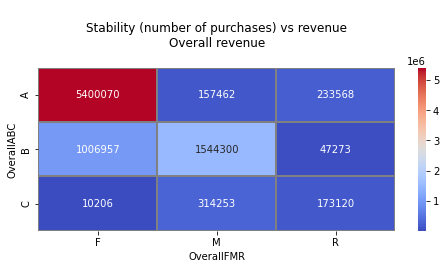

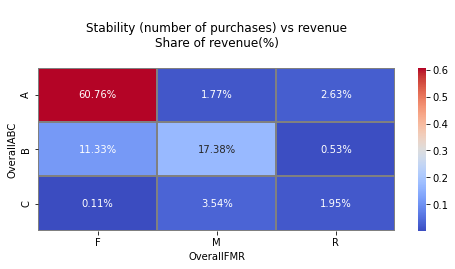

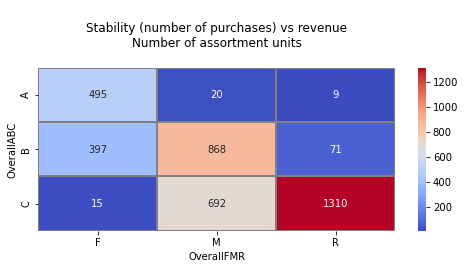

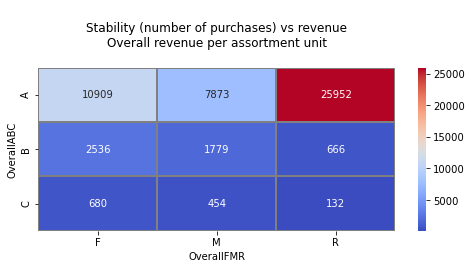

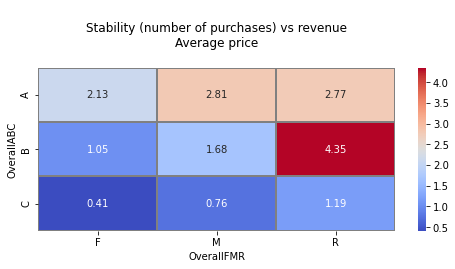

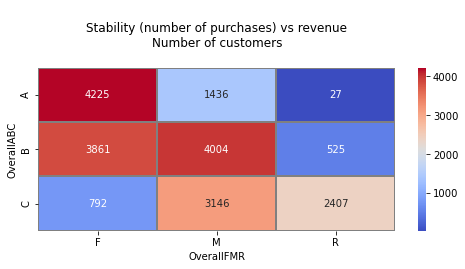

In [48]:
stability_vs_vol_sum = ecommerce_purchases.pivot_table(index='OverallABC',
                                                        columns='OverallFMR',
                                                        values='ItemSum',
                                                        aggfunc='sum').round(0)

stability_vs_vol_quantity = ecommerce_purchases.pivot_table(index='OverallABC',
                                                            columns='OverallFMR',
                                                            values='Quantity',
                                                            aggfunc='sum').round(0)

stability_vs_vol_unique = ecommerce_purchases.pivot_table(index='OverallABC',
                                                            columns='OverallFMR',
                                                            values='Description',
                                                            aggfunc='nunique').round(0)

stability_vs_vol_customers = ecommerce_purchases.pivot_table(index='OverallABC',
                                                                columns='OverallFMR',
                                                                values='CustomerID',
                                                                aggfunc='nunique').round(0)

avg_price = (stability_vs_vol_sum / stability_vs_vol_quantity).round(2)

revenue_per_assortment_unit = (stability_vs_vol_sum / stability_vs_vol_unique).round(0)


fig_size=(8, 3)
plt.figure(figsize=fig_size)

sns.heatmap(stability_vs_vol_sum, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='coolwarm')


plt.title('\nStability (number of purchases) vs revenue\nOverall revenue\n')
plt.show()


plt.figure(figsize=fig_size)
sns.heatmap(stability_vs_vol_sum/stability_vs_vol_sum.sum().sum(), 
            annot=True, fmt=".2%", linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (number of purchases) vs revenue\nShare of revenue(%)\n')
plt.show()


plt.figure(figsize=fig_size)
sns.heatmap(stability_vs_vol_unique, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (number of purchases) vs revenue\nNumber of assortment units\n')
plt.show()


plt.figure(figsize=fig_size)

sns.heatmap(revenue_per_assortment_unit, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (number of purchases) vs revenue\nOverall revenue per assortment unit\n')
plt.show()


plt.figure(figsize=fig_size)

sns.heatmap(avg_price, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (number of purchases) vs revenue\nAverage price\n')
plt.show()


plt.figure(figsize=fig_size)

sns.heatmap(stability_vs_vol_customers, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap='coolwarm')

plt.title('\nStability (number of purchases) vs revenue\nNumber of customers\n')
plt.show()

In [49]:
purchases_by_ABC_FMR = ecommerce_purchases.groupby(['OverallABC','OverallFMR']).agg({'InvoiceNo':'nunique',
                                                                                     'StockCode':'nunique',
                                                                                     'Quantity':'sum',
                                                                                     'CustomerID':'nunique',
                                                                                     'ItemSum':'sum'}).reset_index()


purchases_by_ABC_FMR['share_of_purchases(%)'] = (purchases_by_ABC_FMR['InvoiceNo']\
                                                 / purchases_by_ABC_FMR['InvoiceNo'].sum() * 100).round(2)

purchases_by_ABC_FMR['share_of_assortment_units(%)'] = (purchases_by_ABC_FMR['StockCode']\
                                                 / purchases_by_ABC_FMR['StockCode'].sum() * 100).round(2)

purchases_by_ABC_FMR['share_of_quantity(%)'] = (purchases_by_ABC_FMR['Quantity']\
                                                 / purchases_by_ABC_FMR['Quantity'].sum() * 100).round(2)

purchases_by_ABC_FMR['share_of_customers(%)'] = (purchases_by_ABC_FMR['CustomerID']\
                                                 / purchases_by_ABC_FMR['CustomerID'].sum() * 100).round(2)

purchases_by_ABC_FMR['share_of_revenue(%)'] = (purchases_by_ABC_FMR['ItemSum']\
                                                 / purchases_by_ABC_FMR['ItemSum'].sum() * 100).round(2)


purchases_by_ABC_FMR['ABC_FMR_group'] = purchases_by_ABC_FMR['OverallABC'].str.cat(purchases_by_ABC_FMR['OverallFMR'], sep='/')

purchases_by_ABC_FMR

,OverallABC,OverallFMR,InvoiceNo,StockCode,Quantity,CustomerID,ItemSum,share_of_purchases(%),share_of_assortment_units(%),share_of_quantity(%),share_of_customers(%),share_of_revenue(%),ABC_FMR_group
0,A,F,17425,486,2536688,4225,5400069.660,26.81,12.63,49.24,20.69,60.76,A/F
1,A,M,2866,20,55977,1436,157462.350,4.41,0.52,1.09,7.03,1.77,A/M
2,A,R,50,9,84471,27,233567.660,0.08,0.23,1.64,0.13,2.63,A/R
3,B,F,13619,392,957918,3861,1006956.790,20.95,10.19,18.59,18.91,11.33,B/F
4,B,M,14468,855,919752,4004,1544300.330,22.26,22.22,17.85,19.61,17.38,B/M
5,B,R,716,72,10869,525,47273.340,1.10,1.87,0.21,2.57,0.53,B/R
6,C,F,1460,16,24823,792,10206.340,2.25,0.42,0.48,3.88,0.11,C/F
7,C,M,8889,695,415872,3146,314252.710,13.67,18.06,8.07,15.40,3.54,C/M
8,C,R,5512,1303,145632,2407,173119.714,8.48,33.86,2.83,11.79,1.95,C/R


From the graphs and table above we can see that there are two more groups of products that we need to pay attention to:
* Group 'B/F' and 'B/M'


   
#### Group 'B/F'
#### Overall revenue by group 'B/F'
    
#### Top 10 products


In [50]:
ecommerce_purchases[(ecommerce_purchases['OverallABC'] == 'B') & (ecommerce_purchases['OverallFMR'] == 'F')]\
                    .pivot_table(index='Description',
                                 columns='InvoiceMonth',
                                 values='ItemSum',
                                 aggfunc='sum',
                                 margins=True).sort_values(by='All', ascending=False).head(11).iloc[1:]

InvoiceMonth,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,All
Description,,,,,,,,,,,,,,,
TEA TIME PARTY BUNTING,23.25,204.60,1323.45,1092.75,782.10,1612.50,2057.70,1375.05,1270.95,306.90,123.75,183.15,69.30,4.95,10430.40
WHITE SKULL HOT WATER BOTTLE,161.25,2413.35,198.75,71.25,37.50,41.25,48.75,67.50,67.50,1510.62,738.75,1265.50,3009.00,584.50,10215.47
WOODEN UNION JACK BUNTING,17.85,178.50,707.65,755.65,3354.20,2909.15,517.25,166.60,582.50,184.45,148.75,126.63,184.45,95.20,9928.83
REGENCY MILK JUG PINK,NaN,NaN,NaN,NaN,NaN,NaN,2002.25,2698.25,1952.25,236.00,1079.50,580.50,420.25,26.00,8995.00
RAIN PONCHO RETROSPOT,NaN,108.80,222.80,4.25,102.00,90.70,204.00,486.40,226.10,561.20,2045.06,1077.13,1802.26,31.38,6962.08
RED FLORAL FELTCRAFT SHOULDER BAG,26.25,251.25,123.75,157.50,206.25,168.75,142.50,191.25,366.09,1291.32,502.79,2399.88,779.31,119.92,6726.81
72 SWEETHEART FAIRY CAKE CASES,52.80,621.85,757.45,382.75,679.25,372.95,313.30,261.40,882.35,312.56,649.31,429.85,437.88,98.65,6252.35
BROCADE RING PURSE,15.12,183.87,545.22,125.57,827.88,138.08,676.97,667.80,492.91,408.26,592.08,768.84,418.35,108.66,5969.61
DOORSTOP RETROSPOT HEART,45.00,249.24,340.98,142.50,206.25,78.75,176.25,97.50,168.75,292.50,3249.23,337.68,471.08,63.75,5919.46


#### Group 'B/M'
#### Overall revenue by group 'B/M'
    
#### Top 10 products

In [51]:
ecommerce_purchases[(ecommerce_purchases['OverallABC'] == 'B') & (ecommerce_purchases['OverallFMR'] == 'M')]\
                    .pivot_table(index='Description',
                                 columns='InvoiceMonth',
                                 values='ItemSum',
                                 aggfunc='sum',
                                 margins=True).sort_values(by='All', ascending=False).head(11).iloc[1:]

InvoiceMonth,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,All
Description,,,,,,,,,,,,,,,
PAPER CHAIN KIT VINTAGE CHRISTMAS,716.50,2520.95,35.40,137.40,NaN,102.00,17.70,17.70,1213.00,1503.00,4155.29,5427.05,8203.51,1590.27,25639.77
ROTATING SILVER ANGELS T-LIGHT HLDR,814.50,2955.75,15.30,NaN,NaN,2.55,153.00,10.20,272.40,288.15,1693.39,4630.75,5305.05,1413.23,17554.27
FAIRY CAKE FLANNEL ASSORTED COLOUR,68.85,252.45,6840.45,122.40,221.85,6610.80,25.50,45.90,94.35,160.65,145.35,660.52,1902.67,139.83,17291.57
HAND WARMER OWL DESIGN,708.90,1079.70,132.30,NaN,44.10,18.90,6.30,16.80,4.20,813.00,3852.23,3389.54,4718.37,1329.39,16113.73
PAPER CHAIN KIT EMPIRE,53.10,73.75,631.75,1905.80,3551.55,6224.15,499.00,342.65,47.20,17.70,32.45,NaN,NaN,32.45,13411.55
RED WOOLLY HOTTIE WHITE HEART.,2117.64,1888.05,81.36,41.25,15.00,3.75,NaN,NaN,NaN,249.62,1458.53,2381.75,4587.98,486.33,13311.26
HAND WARMER SCOTTY DOG DESIGN,729.90,981.90,2.10,NaN,2.10,2.10,6.30,NaN,NaN,549.30,2662.80,2213.52,4159.74,894.90,12204.66
HAND WARMER BIRD DESIGN,551.40,2319.90,NaN,2.10,6.30,8.40,NaN,NaN,NaN,387.60,2421.23,2146.15,2922.46,1299.09,12064.63
PICNIC BASKET WICKER LARGE,29.85,119.40,650.10,905.50,822.55,1694.90,5551.10,361.20,139.30,99.50,NaN,296.25,129.35,NaN,10799.00


#### Purchases, assortment units, quantity, customers, revenue by ABC / FMR group

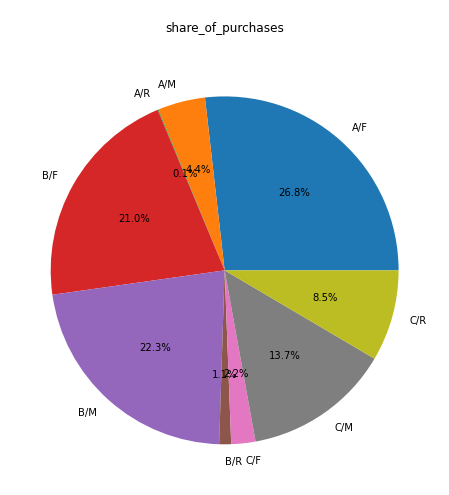

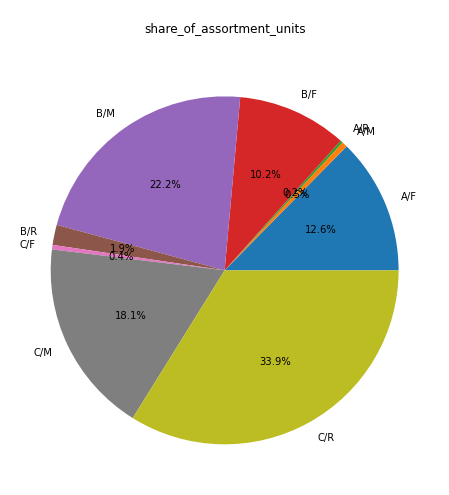

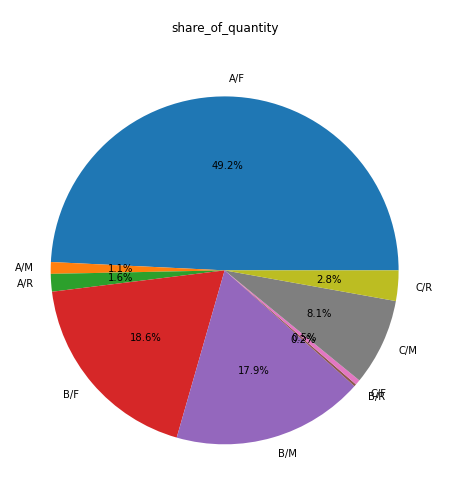

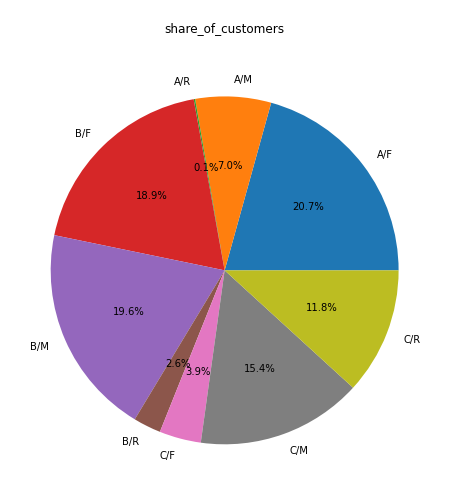

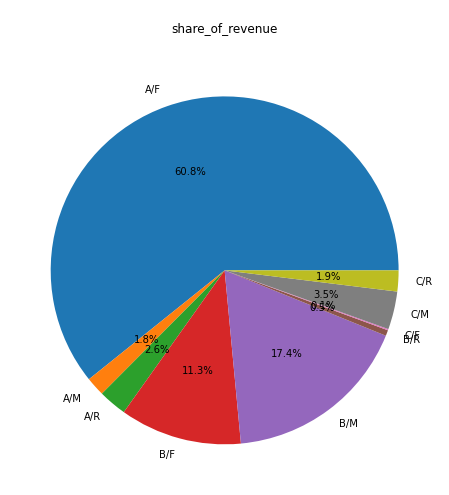

In [52]:
titles = ['share_of_purchases','share_of_assortment_units','share_of_quantity',
          'share_of_customers','share_of_revenue']

labels = purchases_by_ABC_FMR['ABC_FMR_group']
cols = purchases_by_ABC_FMR.columns[2:-1]

for col, ttl in zip(cols, titles):
    values = purchases_by_ABC_FMR[col]

    plt.figure(0, figsize=(8, 8))
    plt.title(f'\n{ttl}\n')
#     plt.pie(values, labels=[i+': '+str(round(j)) for i, j in zip(labels, values)], shadow=True, autopct='%1.1f%%')
    plt.pie(values, labels=labels, autopct='%1.1f%%')

    plt.show()

In [53]:
print('\n\n\nFrom heatmaps and pie charts above we can see a huge difference between ABC_FMR_groups:')

display(purchases_by_ABC_FMR[['ABC_FMR_group','share_of_revenue(%)',
                              'share_of_assortment_units(%)','share_of_quantity(%)']].set_index('ABC_FMR_group').T)

print("\n\nIn group 'C':\n\n\tmore than 50% of assortment units\n\tmore than 10% of quantity\
\n\n\tshare of revenue from this group only 5.6%\
\n\nIn group 'A':\n\n\tabout 13% of assortment units\n\t53% of quantity\
\n\n\tshare of revenue from this group exceeds 65%")




From heatmaps and pie charts above we can see a huge difference between ABC_FMR_groups:


ABC_FMR_group,A/F,A/M,A/R,B/F,B/M,B/R,C/F,C/M,C/R
share_of_revenue(%),60.76,1.77,2.63,11.33,17.38,0.53,0.11,3.54,1.95
share_of_assortment_units(%),12.63,0.52,0.23,10.19,22.22,1.87,0.42,18.06,33.86
share_of_quantity(%),49.24,1.09,1.64,18.59,17.85,0.21,0.48,8.07,2.83




In group 'C':

	more than 50% of assortment units
	more than 10% of quantity

	share of revenue from this group only 5.6%

In group 'A':

	about 13% of assortment units
	53% of quantity

	share of revenue from this group exceeds 65%


## 5. Testing hypotheses <a id='5'></a>
[Back to top](#top)

We want to compare two periods: December 2018 and December 2019 (although these months are not complete)

We're interested if 'Quantity', 'UnitPrice', 'ItemSum', 'InvoiceSum' have changed significantly

Let's take a look on 'mean' and 'median' values:

In [54]:
ecommerce_purchases.groupby('InvoiceMonth')[['Quantity', 'UnitPrice', 'ItemSum', 'InvoiceSum']].agg(['mean', 'median'])

Quantity        UnitPrice           ItemSum         InvoiceSum  \
                   mean median      mean median       mean median        mean   
InvoiceMonth                                                                    
2018-11-01    14.309308      6  3.199694   2.10  24.213135  13.20  473.105375   
2018-12-01    11.729565      4  3.132920   2.10  21.869191  10.50  557.497525   
2019-01-01    16.063152      6  3.148194   1.95  26.380431  12.60  749.595886   
2019-02-01    13.407461      6  3.274532   1.95  22.829432  13.50  693.565090   
2019-03-01    13.295142      6  3.216488   1.95  22.163837  12.60  663.342669   
2019-04-01    12.718800      6  3.496214   1.95  20.708490  12.60  524.455575   
2019-05-01    13.363810      6  3.600847   1.95  24.317221  15.00  692.113013   
2019-06-01    13.345724      6  3.122999   1.69  24.168103  12.50  700.501335   
2019-07-01    13.931177      6  2.866448   1.65  22.659193  12.60  678.704852   
2019-08-01    15.163610      6  2.941539   1.65  24.531100  13.52  889.003406   
2019-09-01    13.189252      6  2.959570   1.95  23.192588  13.20  792.638558   
2019-10-01    12.320855      5  3.347217   1.95  21.476286  11.25  864.468562   
2019-11-01    10.552194      4  2.886126   1.79  18.459204   9.90  800.235396   
2019-12-01    18.234210      4  2.705975   1.65  33.026835   9.36  952.504589   

                      
              median  
InvoiceMonth          
2018-11-01    313.49  
2018-12-01    336.94  
2019-01-01    407.95  
2019-02-01    397.29  
2019-03-01    366.02  
2019-04-01    366.48  
2019-05-01    384.58  
2019-06-01    363.70  
2019-07-01    380.12  
2019-08-01    407.40  
2019-09-01    461.40  
2019-10-01    462.81  
2019-11-01    380.64  
2019-12-01    382.47

From the table above we can't tell if there is significant difference

### Null Hypothesis:
* There's no statistically significant difference between average 'Quantity', 'UnitPrice', 'ItemSum', 'InvoiceSum' in December 2018 and December 2019.

In [55]:
# we're gonna check if the data has a Normal distribution:
#     if it's normal (null hypothesis):
#         we use T-test
#     if it's not normal (we reject the null hypothesis):
#         we use 

cols = ['Quantity', 'UnitPrice', 'ItemSum', 'InvoiceSum']

for col in cols:
    sample_2018 = ecommerce_purchases[ecommerce_purchases['InvoiceMonth'] == pd.to_datetime('2018-12-01')][col]
    sample_2019 = ecommerce_purchases[ecommerce_purchases['InvoiceMonth'] == pd.to_datetime('2019-12-01')][col]


    alpha = 0.05
    
# check if the data has a Normal distribution:
    norm_test_18 = stats.normaltest(sample_2018)
    norm_test_19 = stats.normaltest(sample_2019)
    

# the null hypothesis is that a sample comes from a normal distribution

    if any([norm_test_18.pvalue.round(5) > alpha, norm_test_19.pvalue.round(5) < alpha]):
        
# Normality test. We reject the null hypothesis. We use Mann-Whitney:

        results = stats.mannwhitneyu(sample_2018, sample_2019)

        print(f"\nThe data doesn't follow normal distribution.\nWe use Mann-Whitney test.\nNull hypothesis: \
                \n\tThere's no statistically significant difference between average\
                \n\t{col}\n\tin December 2018 and December 2019.\n\np-value: ", 
              results.pvalue.round(5))

        if (results.pvalue < alpha):
                print("\nDecision: We reject the null hypothesis\nThere IS significant difference")
        else:
                print("\nDecision: We can't reject the null hypothesis\nThere's NO significant difference")
        print('\n******************************************\n')
    
    else:
        
# Normality test. We can't reject the null hypothesis. We use T-test:

        results = stats.ttest_ind(sample_2018, sample_2019)


        print(f"\nThe data has a normal distribution.\nWe use T-test.\nNull hypothesis: \
                \n\tThere's no statistically significant difference between average\
                \n\t{col}\n\tin December 2018 and December 2019.\n\np-value: ", 
              results.pvalue.round(5))

        if (results.pvalue < alpha):
                print("\nDecision: We reject the null hypothesis\nThere IS significant difference")
        else:
                print("\nDecision: We can't reject the null hypothesis\nThere's NO significant difference")
        print('\n******************************************\n')


The data doesn't follow normal distribution.
We use Mann-Whitney test.
Null hypothesis:                 
	There's no statistically significant difference between average                
	Quantity
	in December 2018 and December 2019.

p-value:  0.00167

Decision: We reject the null hypothesis
There IS significant difference

******************************************


The data doesn't follow normal distribution.
We use Mann-Whitney test.
Null hypothesis:                 
	There's no statistically significant difference between average                
	UnitPrice
	in December 2018 and December 2019.

p-value:  0.0

Decision: We reject the null hypothesis
There IS significant difference

******************************************


The data doesn't follow normal distribution.
We use Mann-Whitney test.
Null hypothesis:                 
	There's no statistically significant difference between average                
	ItemSum
	in December 2018 and December 2019.

p-value:  0.0

Decision: We

## 6. Conclusion. <a id='6'></a>
[Back to top](#top)

#### Our tasks were:
* Analyze the product range
* Formulate and test statistical hypotheses


#### We  calculated:
* Revenue
* Average check
* ARPPU (Average revenue per paying user)
* Number of purchases per day
* Number of customers
* Number of assortment units
* Revenue per assortment unit
* Share of active months
* ABC and FMR groups

#### After categorization of assortment
* We analyzed the product range and we managed to assess the effectiveness of sales in each group
* The most profitable groups:
    * 'A/F'
    * 'B/F' 'B/M'
* The most unreliable group:
    * 'C'

#### Our Null hypothesis was:
* There's no statistically significant difference between average `'Quantity'`, `'UnitPrice'`, `'ItemSum'`, `'InvoiceSum'` in December 2018 and December 2019.

#### We carried out 4 statistical hypothesis tests with a statistical significance level of 0.05 and discovered:

    
* There IS `statistically significant` difference between average `'Quantity'`, `'UnitPrice'`, `'ItemSum'`, `'InvoiceSum'` in December 2018 and December 2019.
